# Passing multiple values to functions

So far we have seen several ways to pass data to a function. One way is to use a series of values seperated by a comma

In [1]:
def passComma(x,y,z):
    print(x,y,z)
passComma(1,2,3)

1 2 3


The problem is that it only works with the exact number of items

In [2]:
passComma(1,2)

TypeError: passComma() missing 1 required positional argument: 'z'

In [3]:
def passComma(x=0,y=0,z=0):
    print(x,y,z)
passComma(1,2,3)

1 2 3


In [4]:
passComma(1,2)

1 2 0


We have seen ways of passing arguments though that can take any number of arguments. look at print. It can take any number of arguments

In [5]:
print(1,2)
print(1,2,3,4,5)


1 2
1 2 3 4 5


In [10]:
def passComma(x=0,y=0,z=0):
    if( z==0):print(x,y)
    elif(y==0 and z==0): print(x)
    print(x,y,z)

In [11]:
passComma(1,2,3)
passComma(1,2)
passComma(1)

1 2 3
1 2
1 2 0
1 0
1 0 0


We can even add keywords arugments that are optional

In [ ]:
print(1,2,3,4,5,sep=",")

How do we do this in our own code?

In [24]:
def testfunc(*args,**kwargs):
    print(type(args))
    print(type(kwargs))
    if 'keyword' in kwargs.keys():
        print(kwargs['keyword']*"!")

In [ ]:
grep | lsusb -f -r -12356526

In [27]:
testfunc(1,2,3,4,5,otherword="test",keyword = 4)

<class 'tuple'>
<class 'dict'>
!!!!


In [15]:
def average(*args):
    x = len(args)
    y = sum(args)
    return y/x

average(1,2,3,4,5)
    

3.0

In [23]:
def tupleAverage(tup):
    x = len(tup)
    y = sum(tup)
    return y/x

tupleAverage((1,2,3,4,5))

3.0

Here we see that we are making a tuple or a dictionary. We know how to handle those!

So what are those ***** doing?
\
\
Its called unpacking, ***** is for tuples and list, ****** is for dictionaries

In [19]:
def my_sum(a, b, c):
    print(a)
    print(b)
    print(c)
    print(a + b + c)

my_list = [1, 2, 3]
my_sum(*my_list)

1
2
3
6


In [20]:
my_first_dict = {"A": 1, "B": 2}
my_second_dict = {"C": 3, "D": 4}
my_merged_dict = {**my_first_dict, **my_second_dict}

print(my_merged_dict)

{'A': 1, 'B': 2, 'C': 3, 'D': 4}


In [22]:
list1 = list(range(0,10))

list2 = list(range(0,10))

*zip(list1,list2)

# Pure vs Impure functions

What make a function "pure"

In [74]:
def pureFunction(x):
    y = []
    for i in range(len(x)):
        y.append( x[i]**2)
    return y

x = [1,2,3,4]
y = pureFunction(x)
print(x)
print(y)

[1, 2, 3, 4]
[1, 4, 9, 16]


In [75]:
def impureFunction(x):
    for i in range(len(x)):
        x[i] = x[i]**2
x = [1,2,3,4]

In [80]:

y = impureFunction(x)
print(x)
print(y)

[1, 4294967296, 1853020188851841, 18446744073709551616]
None


Here the main difference between a pure function and an impure one is that the impure one chages the value of something passed to it. It does something other than return a value. both are doing $X->X^2$ but the pure function returns a value, and the impure one just relies on mutation


Changing something without returning a value is known as a "side-effect" 

What else is a side effect?

\
\
\
\
\
\
\
\
\
\
\



### Globals

In [38]:
x = 0

def setx(n):
    global x
    x = n

print(x)
y = setx(5)
print(y)
print(x)

0
None
5


Global variables let you change something in the code without seeing it immediately. 
\
what else generates side effects?
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
## file writing

In [39]:
def addToFile():
    with open("myfile.txt","a") as file:
        file.write("I need to add something\n")
        

def readFromFile():
    contents = ''
    with open("myfile.txt","r") as f:
        contents =f.read()
        return contents
    return contents



addToFile()
x = readFromFile()
print(x)
addToFile()
addToFile()
addToFile()
y = readFromFile()
print(y)

I need to add something

I need to add something
I need to add something
I need to add something
I need to add something



## Print Statements

In [40]:
x = print("This is a side effect")
print(x)

This is a side effect
None


## Try to write pure functions
Its better to write pure functions because it increases readability and it make it possible to track down bugs and test your code. In genernal the only times you should deal with side-effects is when you are doing I/O operations like talking to a port, reading an writing files, printing, etc. 

\
\
\
\
\
\
\
\
\
\
\
\
\
\

# Function Composition

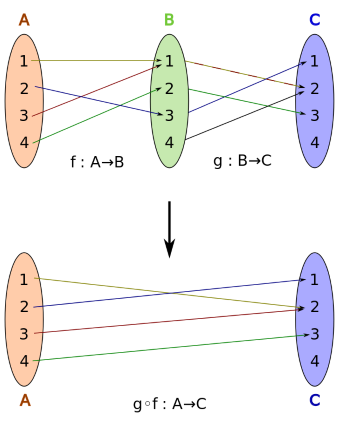

In [41]:
def f(x):
    if x==1: return 1
    elif x==2: return 3
    elif x==3: return 1
    elif x==4: return 2
    return 0

def g(x):
    if x==1: return 2
    elif x==2: return 3
    elif x==3: return 1
    elif x==4: return 2
    return 0

print(f(1))
print(g(1))

1
2


In [42]:
h = lambda x:g(f(x))
print (h(1))
print (h(2))
print (h(3))
print (h(4))

2
1
2
3


In [43]:
def double(x):
     return x * 2

def inc(x):
     return x + 1

inc_and_double = lambda x: double(inc(x)) # 2(x+1)
inc_and_double(10)

22

In [44]:
double_and_inc = lambda x: inc(double(x)) # 2x+1
double_and_inc(10)

21

You can combine functions together to make new functions! An important thing to note is that **ORDER MATTERS**\
$f \circ g$ may not be the same as $g \circ f$

**What if you have a whole bunch of functions you want to compost together?**

In [45]:
from functools import reduce

def compose(*funcs):
    """Compose a group of functions (f(g(h(...)))) into a single composite func."""
    return reduce(lambda f, g: lambda x: f(g(x)), funcs)

# Example
f = lambda x: x + 1
g = lambda x: x * 2
h = lambda x: x - 3

# Call the function x=10 : ((x-3)*2)+1 = 15
print(compose(f, g, h)(10))#((x-3)*2)+1
print(compose(g,f, h)(10)) #((x-3)+1)*2 
print(compose(g,h,f)(10))  # ((x+1)-3)*2 - The same as above because order doenst matter on + or -

15
16
16


What! thats crazy! you can put functions in a list? or tuple? What about a dictionary or set?

In [46]:
func_set = set((double,inc))
print(func_set)

{<function double at 0x000001E080D47048>, <function inc at 0x000001E080D470D0>}


In [47]:
func_dict = {"dub":double,"plus1":inc}
print(func_dict)

{'dub': <function double at 0x000001E080D47048>, 'plus1': <function inc at 0x000001E080D470D0>}


OK so we can store functions as variables, in lists, can we pass and return functions?
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
We already have passed functions to function! we did it with **map**, **reduce**, and **filter**

In [48]:
list1 = [1,2,3,4,5,6,7,8,9]
eg = map(double, list1)
print (eg)
print(list(eg))

[2, 4, 6, 8, 10, 12, 14, 16, 18]


Here we pass double into map. Where in math do we commonly pass functions to function?
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
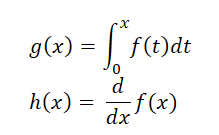

These are called higher order functions. They are functions that take in and return functions.


when is it good to write a function that takes in another function? when you see a pattern in your code that is replicated across instances. Forinstance lets look at our old friend sumations

In [49]:
def summation(n, term):
    total, k = 0, 1
    while k <= n:
        total, k = total + term(k), k + 1
    return total

def cube(k):
    return pow(k,3)

def oneOver(k):
    if k==0: return 0
    return 1/k

summation(10,cube)

3025

In [ ]:
def summationCube(n, term):
    total, k = 0, 1
    while k <= n:
        total, k = total + pow(k,3), k + 1
    return total

def summation(n, term):
    total, k = 0, 1
    while k <= n:
        if k>0
            total, k = total + 1/k, k + 1
        else
            total, k = total + 0, k + 1
    return total


In [50]:
summation(10,oneOver)

2.9289682539682538

Another reason to pass functions is to eliminate case statements

Lets say you need to write a report about data from several samples 

In [51]:
import random
stock = {"steel": random.randrange(100,10000),
         "aluminum": random.randrange(100,10000),
         "brass": random.randrange(100,10000),
        }

In [52]:
def writeReport(data):
    align = max(map(len,data))
    for material,count in data.items():
        print('{material:<{align}}  {count:>10,}'.format(material=material, count=count, align=align))

In [53]:
writeReport(stock)

steel          7,549
aluminum       1,014
brass            345


Lets say someone comes and says write to a file

In [54]:
def writeReport(data,filename = None):
    align = max(map(len,data))
    for material,count in data.items():
        line = '{material:<{align}}  {count:>10,}'.format(material=material, 
                                                          count=count, align=align)
        if filename:
            with open(filename,'a') as f:
                f.write(line)
        print (line)

In [56]:
writeReport(stock,filename = "MyReport.txt")

steel          7,549
aluminum       1,014
brass            345


Then someone comes and says, can we write it and email at the same time

In [ ]:
def writeReport(data,filename = None, to_email=None):
    align = max(map(len,data))
    if to_email:
        lines = []
    
    for material,count in data.items():
        line = '{material:<{align}}  {count:>10,}'.format(material=material, 
                                                          count=count, align=align)
        if filename:
            with open(filename,'a') as f:
                f.write(line)
        
        if to_email: lines.append(line)
        print (line)
        
    if to_email: 
        email = "\n".join(lines)
        return email

instead of true false values we can use a function called write

In [57]:
template1 = '{material:<{align}}  {count:>10,}'.format # REquires material, align, count
def writeReport(data,write = print, template=template1):
    align = max(map(len,data))
    for material1,count1 in data.items():
        line = template(material=material1, count=count1, align=align1)
        write(line)
        
writeReport(stock)

steel          7,549
aluminum       1,014
brass            345


In [60]:
def toFile(line):
    filename = "log.txt"
    with open(filename,'a') as f:
        f.write(line)
        
writeReport(stock,write=toFile)

In [62]:
cvstemplate = '{material},{count}\n'.format
writeReport(stock,write=toFile,template=cvstemplate)

## What about returning a function? When do we want to return functions?

A funciton that makes a common type of function with a value set

In [63]:
def incrementBy(n):
    def adder(k):
        return k+n
    return adder

i2 = incrementBy(2)
list(map(i2,range(0,10)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [82]:
i2(7)

9

In [83]:
def incrementListBy(n):
    def adder(*args):
        y=[]
        for a in args:
            y.append(a+n)
        return y
    return adder

In [84]:
iL1 = incrementListBy(3)

In [85]:
iL1(1,2,3,4,5)

[4, 5, 6, 7, 8]

\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

Wrapping a function is useful for debugging and logging

In [93]:
def wrap(pre, post):
    def decorate(func):
        def call(*args, **kwargs):
            pre(func, *args, **kwargs)
            result = func(*args, **kwargs)
            post(func, *args, **kwargs)
            return result
        return call
    return decorate



def trace_in(func, *args, **kwargs):
    print ("Entering function",  func.__name__)

def trace_out(func, *args, **kwargs):
    print ("Leaving function", func.__name__)

@wrap(trace_in, trace_out)
def calc(x, y):
    return x + y

print (calc(1,4))

Entering function calc
Leaving function calc
5


In [97]:
wrap(trace_in,trace_out)(i2)(1)

Entering function adder
Leaving function adder


3